In [358]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

ModuleNotFoundError: No module named 'plotly'

In [235]:
# Import Olympic data sets
data=pd.read_csv('athlete_events.csv')
region=pd.read_csv('noc_regions.csv')

In [242]:
# Merge data and region data set
data=pd.merge(data, region, left_on='NOC', right_on='NOC', how='inner')

In [441]:
data.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA,China,NA
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NA,China,NA
2,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000.0,Summer,Sydney,Boxing,Boxing Men's Middleweight,NA,China,NA
3,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004.0,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NA,China,NA
4,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NA,China,NA


In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270767 entries, 0 to 270766
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      270767 non-null  int64  
 1   Name    270767 non-null  object 
 2   Sex     270767 non-null  object 
 3   Age     261305 non-null  float64
 4   Height  210684 non-null  float64
 5   Weight  207982 non-null  float64
 6   Team    270767 non-null  object 
 7   NOC     270767 non-null  object 
 8   Games   270767 non-null  object 
 9   Year    270767 non-null  int64  
 10  Season  270767 non-null  object 
 11  City    270767 non-null  object 
 12  Sport   270767 non-null  object 
 13  Event   270767 non-null  object 
 14  Medal   270767 non-null  object 
 15  region  270746 non-null  object 
 16  notes   270767 non-null  object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [253]:
data.shape

(270767, 17)

In [352]:
data.nunique()

Name      134566
Sex            2
Age          782
Height      2470
Weight      3562
Team        1179
NOC          229
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          4
region       205
notes         22
dtype: int64

# A. Data Cleaning

In [300]:
# Impute missing data for columns Year, Height, Weight, Age
num_cols=data.select_dtypes(include='number').columns

In [301]:
ite_imp=IterativeImputer(min_value=data[num_cols].min(), max_value=data[num_cols].max())

In [302]:
data[num_cols]=ite_imp.fit_transform(data[num_cols])

In [ ]:
# Fill missing Medal with 'NA'
data['Medal']=data['Medal'].replace(np.nan, 'NA', regex=True)

In [245]:
data[num_cols].isna().sum()

ID            0
Age        9462
Height    60083
Weight    62785
Year          0
dtype: int64

In [259]:
data['Medal'].value_counts()

NA        230993
Gold       13371
Bronze     13291
Silver     13112
Name: Medal, dtype: int64

In [257]:
# Fill missing notes with 'NA'
data['notes']=data['notes'].replace(np.nan, 'NA', regex=True)

In [439]:
data['notes'].value_counts()

NA                             265728
Yugoslavia                       2583
Hong Kong                         685
Trinidad and Tobago               375
Serbia and Montenegro             321
Virgin Islands                    294
Bohemia                           153
Antigua and Barbuda               133
United Arab Republic              123
Individual Olympic Athletes        94
Australasia                        86
Netherlands Antilles               79
Turks and Caicos Islands           42
West Indies Federation             20
Refugee Olympic Team               12
North Yemen                        11
Crete                              11
Tuvalu                              7
South Yemen                         5
North Borneo                        2
Unknown                             2
Newfoundland                        1
Name: notes, dtype: int64

In [ ]:
data.isna().sum()

ID            0
Name          0
Sex           0
Age        9462
Height    60083
Weight    62785
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region       21
notes         0
dtype: int64

In [273]:
# We still have missing values in the column region
# data[data.isna()['region']]

In [275]:
# Drop ID column
 data=data.drop(columns='ID')

B. Exploring Age and Sport

In [271]:
# The distribution of numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,261305.0,25.559783,6.392501,10.0,21.0,24.0,28.0,97.0
Height,210684.0,175.344250,10.519556,127.0,168.0,175.0,183.0,226.0
Weight,207982.0,70.709523,14.350094,25.0,60.0,70.0,79.0,214.0
Year,270767.0,1978.362297,29.884637,1896.0,1960.0,1988.0,2002.0,2016.0


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Year'}>]], dtype=object)

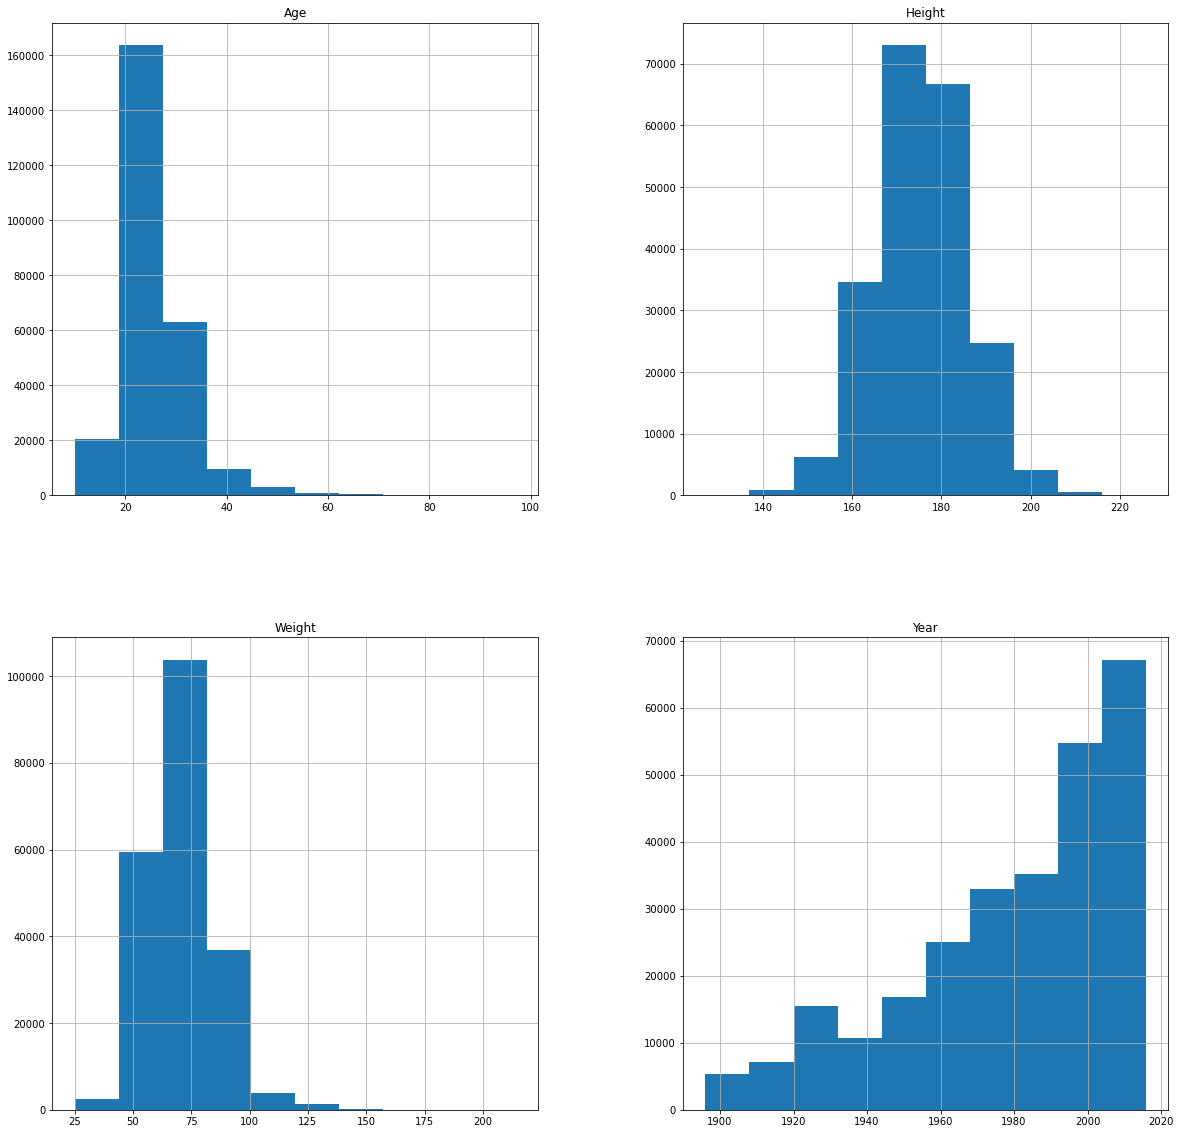

In [292]:
data.hist(figsize=(20,20))

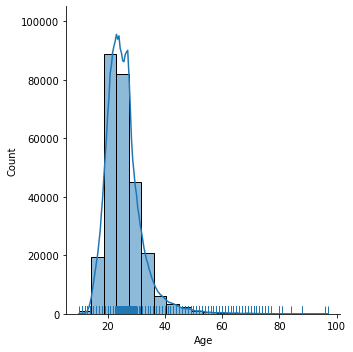

In [67]:
# Histogram by different bins size
sns.displot(data=data, x='Age', rug=True, kde=True, bins=20)

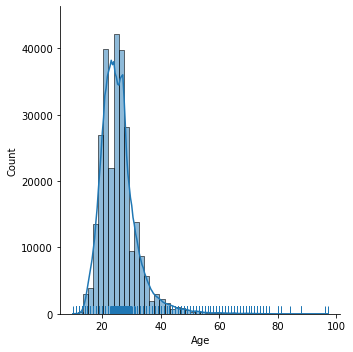

In [68]:
sns.displot(data=data, x='Age', rug=True, kde=True, bins=50)

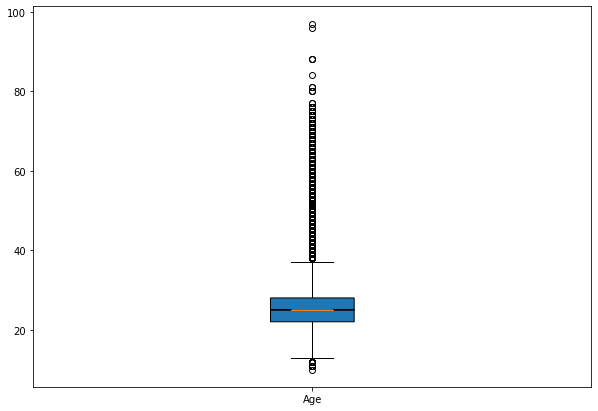

In [325]:
# Box plot represents the diversity of Athletes' Age
plt.figure(figsize=(10, 7))
plt.boxplot(data['Age'], notch=True, patch_artist=True)
plt.xticks([1],['Age'])
plt.show()

There are athletes started their career at a very early age. There are also those who continue staying in their career at an older age. Now we can see what kind of sport that these two groups of age were participating in. 

In [83]:
# Threshold for outliers
data['Age'].min()
#data['Age'].max()

10.0

In [303]:
data.describe()['Age']

count    270767.000000
mean         25.603207
std           6.285820
min          10.000000
25%          22.000000
50%          25.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

In [304]:
# Look at the sport for really young age
(data[['Age', 'Sport']][data['Age'] <= 10]).value_counts()

Age   Sport     
10.0  Gymnastics    1
dtype: int64

In [305]:
# Look at the sport for older age
(data[['Age', 'Sport']][data['Age'] >= 97]).value_counts()

Age   Sport           
97.0  Art Competitions    1
dtype: int64

/Users/ellypham/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


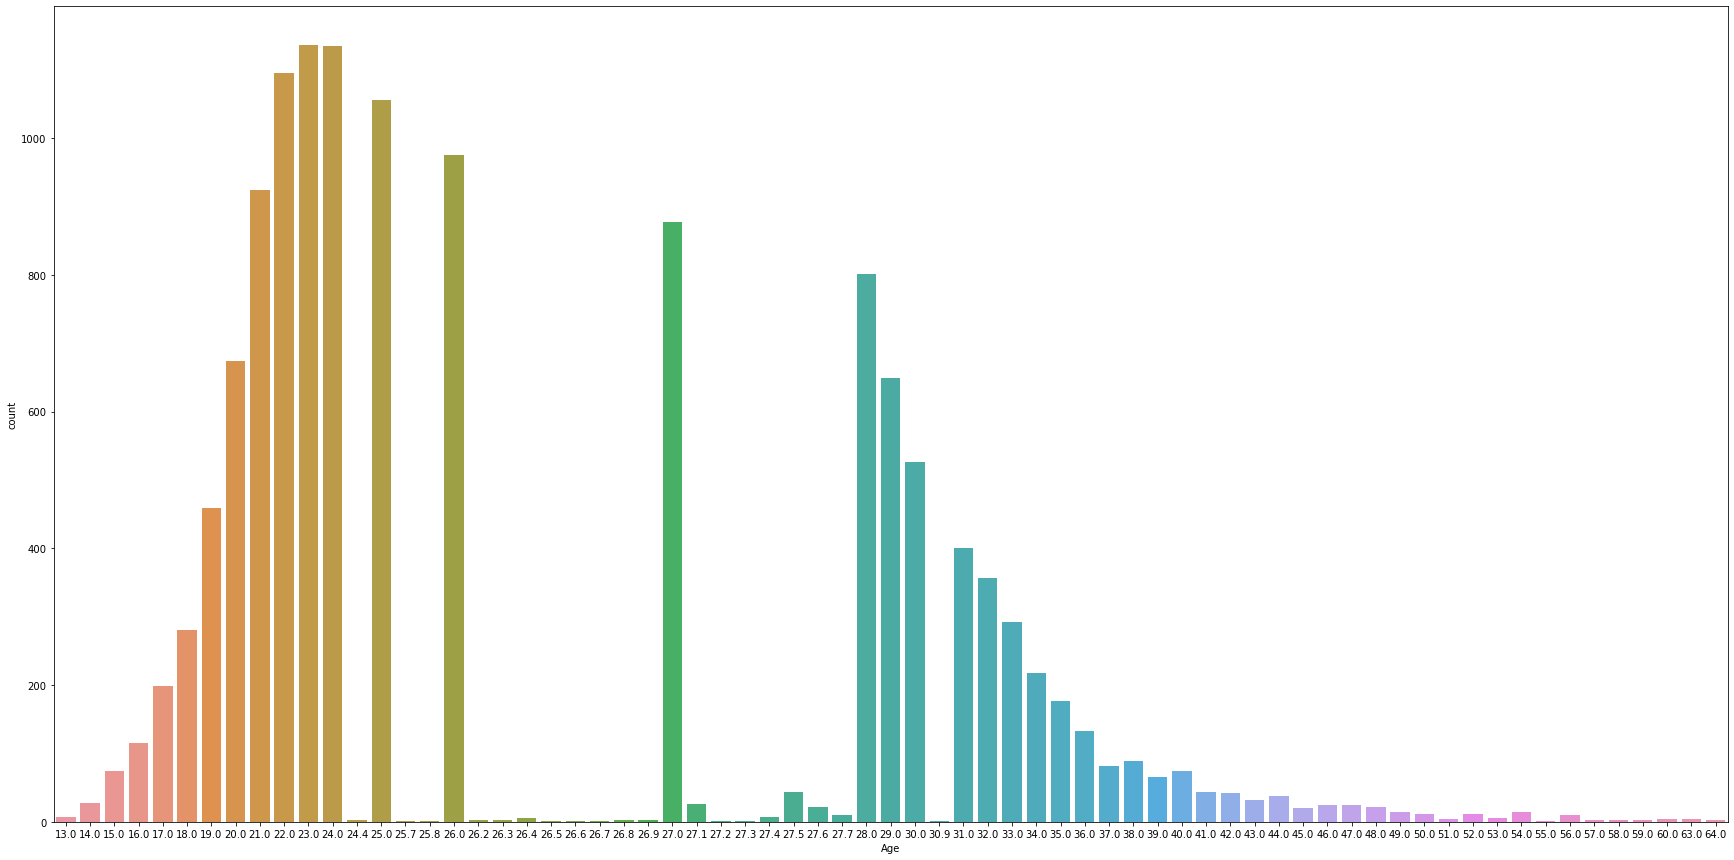

In [376]:
# Look further to see distribution of ages in Gold Medal
age_gold_medal=data['Age'][data['Medal']=='Gold'].round(1)
plt.figure(figsize=(30, 15))
plt.tight_layout()
sns.countplot(age_gold_medal)
plt.show()

In [ ]:
# I wanted to explore further to learn which sport that athletes at ages below 16 and greater than 50 were playing

/Users/ellypham/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


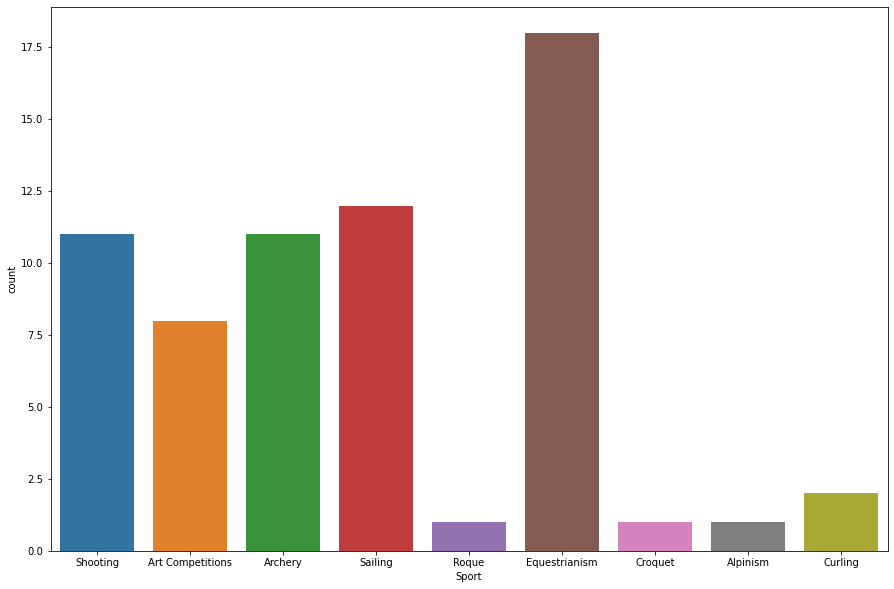

In [431]:
age_limit=data[['Sport', 'Age']][data['Medal']=='Gold']
age_limit= age_limit[age_limit['Age'] > 50]

plt.figure(figsize=(15, 10))
plt.tight_layout()
sns.countplot(age_limit['Sport'])
plt.show()

/Users/ellypham/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


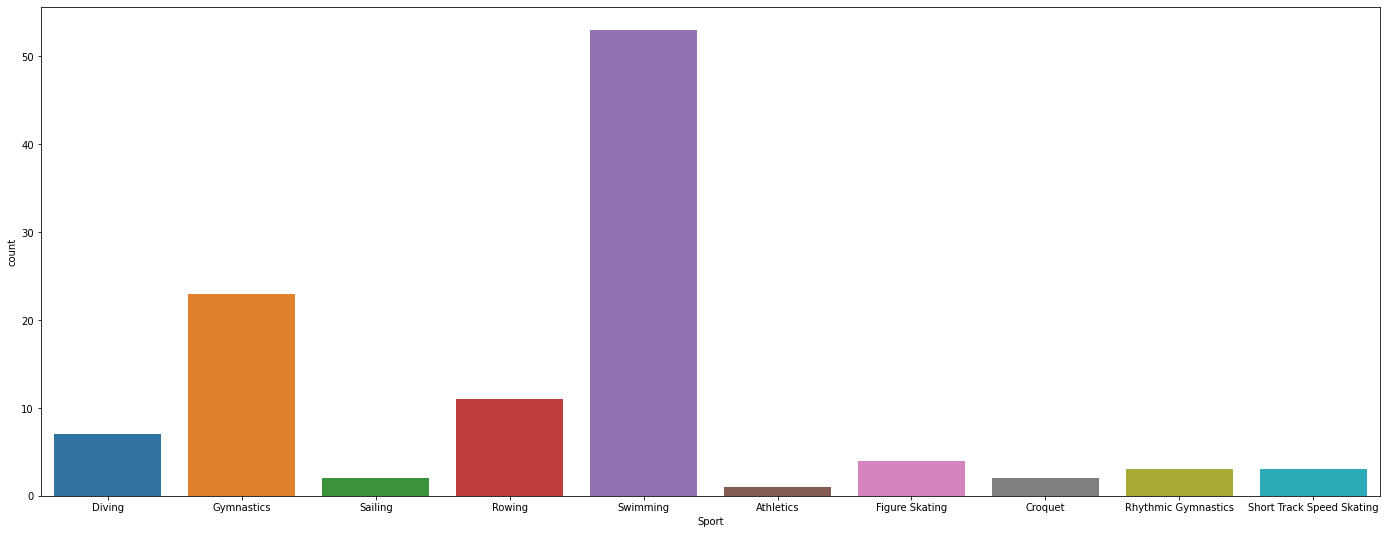

In [429]:
age_limit=data[['Sport', 'Age']][data['Medal']=='Gold']
age_limit= age_limit[age_limit['Age'] < 16]

plt.figure(figsize=(24, 9))
plt.tight_layout()
sns.countplot(age_limit['Sport'])
plt.show()

Let's also explore the same but for the age range from 16 to 50

/var/folders/1c/hx412r8x6f9fhk05j9mcwzy80000gn/T/ipykernel_15151/1789219914.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  age_limit= age_limit[age_limit['Age'].between(16, 50, inclusive=True)]
/Users/ellypham/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


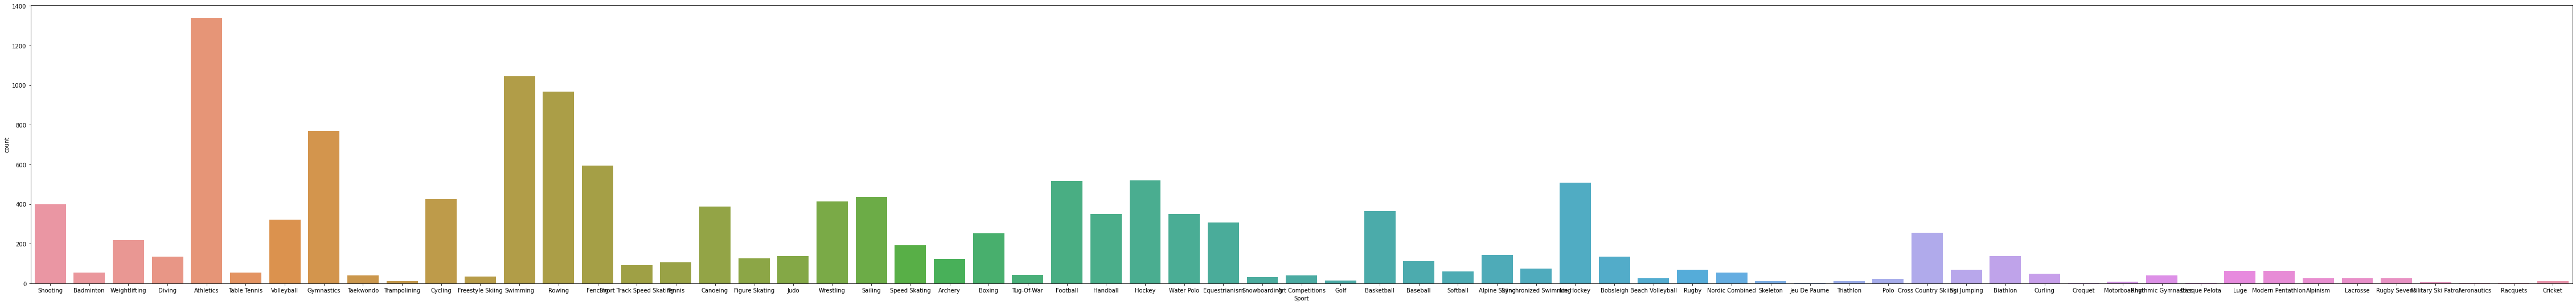

In [436]:
age_limit=data[['Sport', 'Age']][data['Medal']=='Gold']
age_limit= age_limit[age_limit['Age'].between(16, 50, inclusive=True)]

plt.figure(figsize=(80, 9))
plt.tight_layout()
sns.countplot(age_limit['Sport'])
plt.show()

In [ ]:
# Summary of non-numerical columns
data.describe(exclude='number').T

In [327]:
# First record for each Olympic Sport
data.sort_values('Year').groupby(by='Sport').first()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event,Medal,region,notes
Sport,,,,,,,,,,,,,,,
Aeronautics,Hermann Schreiber,M,26.000000,174.586900,71.095743,Switzerland,SUI,1936 Summer,1936.0,Summer,Berlin,Aeronautics Mixed Aeronautics,Gold,Switzerland,NA
Alpine Skiing,Christopher S. Hudson,M,35.000000,176.738251,75.830481,Great Britain,GBR,1936 Winter,1936.0,Winter,Garmisch-Partenkirchen,Alpine Skiing Men's Combined,NA,UK,NA
Alpinism,Theodore Howard Somervell,M,33.000000,176.035869,74.758106,Great Britain,GBR,1924 Winter,1924.0,Winter,Chamonix,Alpinism Mixed Alpinism,Gold,UK,NA
Archery,Frdric Adolphe Petit,M,43.000000,177.977653,79.978503,France,FRA,1900 Summer,1900.0,Summer,Paris,"Archery Men's Au Cordon Dore, 33 metres",Bronze,France,NA
Art Competitions,Robert Tait McKenzie,M,44.000000,178.440995,80.524796,Canada,CAN,1912 Summer,1912.0,Summer,Stockholm,Art Competitions Mixed Sculpturing,NA,Canada,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tug-Of-War,Gustaf Fredrik Sderstrm,M,34.000000,175.826302,75.243765,Denmark/Sweden,SWE,1900 Summer,1900.0,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold,Sweden,NA
Volleyball,Yuriy Mykhailovych Poiarkov,M,27.000000,186.000000,82.000000,Soviet Union,URS,1964 Summer,1964.0,Summer,Tokyo,Volleyball Men's Volleyball,Gold,Russia,NA
Water Polo,J. Bertrand,M,27.616565,174.302061,71.887316,Tritons Lillois-2,FRA,1900 Summer,1900.0,Summer,Paris,Water Polo Men's Water Polo,NA,France,NA


What are the average Age, Height, Weight of female versus male Olympic athletes

In [310]:
data[['Age', 'Height', 'Weight', 'Sex']].groupby(by='Sex').mean().round(2)

,Age,Height,Weight
Sex,,,
F,23.75,168.48,60.97
M,26.30,177.86,74.74


What are the minimum, average, maximum Age, Height, Weight of athletes in different year

In [116]:
data[['Age', 'Height', 'Weight', 'Sex']].groupby(by='Sex').agg(['min', 'max', 'mean']).T

Sex                   F           M
Age    min    11.000000   10.000000
       max    74.000000   97.000000
       mean   23.748465   26.303285
Height min   127.000000  127.000000
       max   213.000000  226.000000
       mean  168.525019  177.671188
Weight min    25.000000   28.000000
       max   167.000000  214.000000
       mean   61.012815   74.537568

What are the total number of medals received by each gender Male and Female

In [165]:
data.groupby('Sex')[['Sex', 'Medal']].count()

,Sex,Medal
Sex,,
F,74522,74522
M,196594,196594


What are the minimum, average, median, maximum Age of athletes for different Season and Sex combinations

In [141]:
pd.pivot_table(data, index=['Season', 'Sex'], 
               values=['Age'],
               aggfunc=['min',  'max', 'mean', 'median'])

min   max       mean median
             Age   Age        Age    Age
Season Sex                              
Summer F    11.0  74.0  23.680664   23.0
       M    10.0  97.0  26.465580   25.0
Winter F    11.0  48.0  24.015741   24.0
       M    12.0  58.0  25.512731   25.0

What are the average Age, Height, Weight of athletes, for different Medal, Season, Sex combinations

In [164]:
pd.pivot_table(data, index=['Medal', 'Season', 'Sex'], 
               values=['Age', 'Height', 'Weight'],
               aggfunc=['min',  'max', 'mean', 'median'])

min                 max                     mean  \
                    Age Height Weight   Age Height Weight        Age   
Medal  Season Sex                                                      
Bronze Summer F    12.0  136.0   28.0  69.0  205.0  141.0  24.632028   
              M    10.0  142.0   37.0  72.0  223.0  182.0  26.350804   
       Winter F    15.0  150.0   40.0  45.0  187.0   86.0  25.115578   
              M    14.0  157.0   53.5  48.0  201.0  123.0  26.386169   
Gold   Summer F    13.0  136.0   28.0  63.0  210.0  136.0  24.211986   
              M    13.0  140.0   42.0  64.0  223.0  170.0  26.488940   
       Winter F    13.0  147.0   36.0  43.0  184.0   95.0  25.202636   
              M    16.0  155.0   50.0  57.0  201.0  130.0  26.603701   
NA     Summer F    11.0  127.0   25.0  74.0  213.0  167.0  23.524566   
              M    11.0  127.0   28.0  97.0  226.0  214.0  26.433475   
       Winter F    11.0  137.0   32.0  48.0  194.0   96.0  23.854310   
              M    12.0  142.0   47.0  55.0  211.0  145.0  25.376253   
Silver Summer F    11.0  136.0   30.0  55.0  204.0  167.0  24.290199   
              M    13.0  145.0   47.0  73.0  223.0  154.0  26.666667   
       Winter F    15.0  145.0   41.0  46.0  187.0   86.0  25.240527   
              M    15.0  152.0   50.0  58.0  200.0  116.0  26.430566   

                                         median                
                       Height     Weight    Age Height Weight  
Medal  Season Sex                                              
Bronze Summer F    170.861847  63.476378   24.0  171.0   63.0  
              M    181.142241  78.886354   25.0  181.0   78.0  
       Winter F    166.953982  60.677477   25.0  167.0   60.0  
              M    179.678673  78.709223   26.0  180.0   78.0  
Gold   Summer F    171.381818  63.795652   24.0  172.0   63.0  
              M    181.680343  79.632568   25.0  182.0   78.0  
       Winter F    167.218371  61.764235   25.0  167.0   61.0  
              M    180.323636  79.354069   26.0  180.0   79.0  
NA     Summer F    167.598860  59.412097   23.0  168.0   59.0  
              M    178.468472  74.973865   25.0  178.0   73.0  
       Winter F    166.420642  59.520347   23.0  167.0   59.0  
              M    178.495761  76.009897   25.0  179.0   75.0  
Silver Summer F    171.074931  63.461338   24.0  171.0   63.0  
              M    181.333929  79.274533   25.0  182.0   78.0  
       Winter F    167.618307  61.681338   25.0  168.0   61.0  
              M    179.737705  78.564711   26.0  180.0   78.0

Analyzing the association between Height and Weight

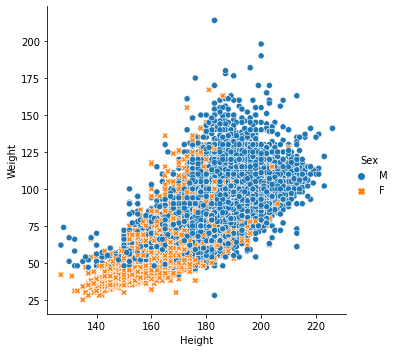

In [168]:
sns.relplot(data=data, x='Height', y='Weight', kind='scatter', hue='Sex', style='Sex')

Analyzing correlation between multiple variables Age, Height, Weight

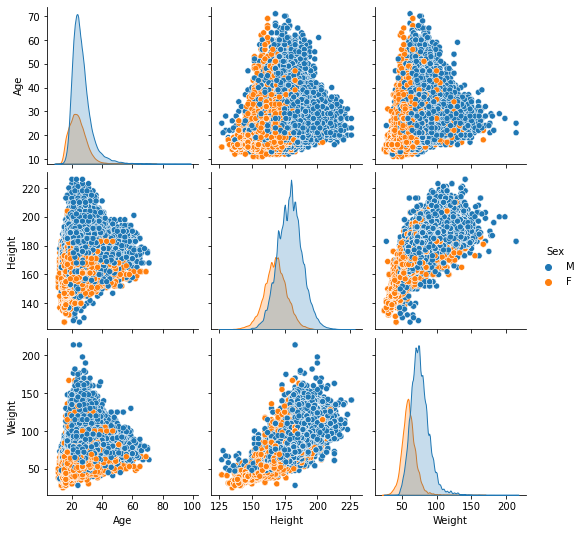

In [182]:
sns.pairplot(data=data[['Age', 'Height', 'Weight', 'Sex']], hue='Sex')

In [183]:
data[['Age', 'Height', 'Weight']].corr()

,Age,Height,Weight
Age,1.000000,0.138246,0.212069
Height,0.138246,1.000000,0.796213
Weight,0.212069,0.796213,1.000000


<AxesSubplot:>

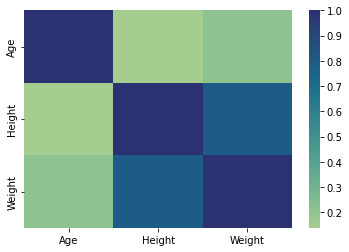

In [184]:
sns.heatmap(data[['Age', 'Height', 'Weight']].corr(), cmap='crest')

Look for outliers in Age variable and check the distribution of Age by Sex and Season

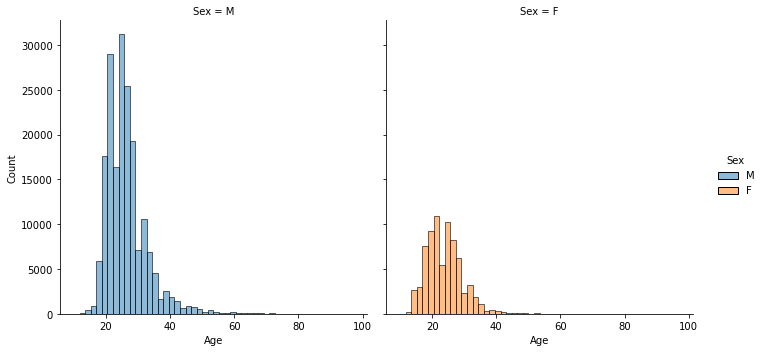

In [191]:
sns.displot(data=data, x='Age', kind='hist', bins=50, hue='Sex', col='Sex')

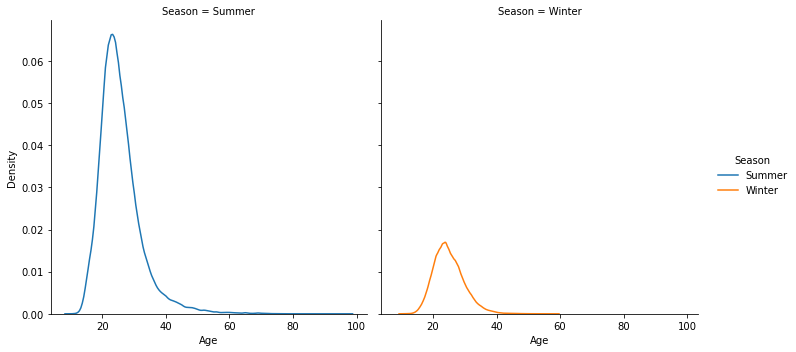

In [193]:
sns.displot(data=data, x='Age', kind='kde', hue='Season', col='Season')

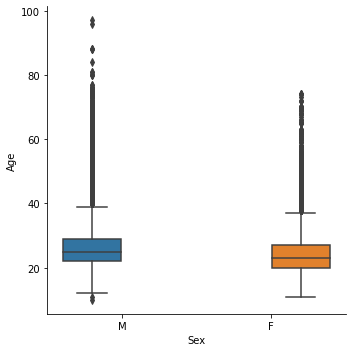

In [199]:
sns.catplot(data=data, x='Sex', y='Age', kind='box', hue='Sex')

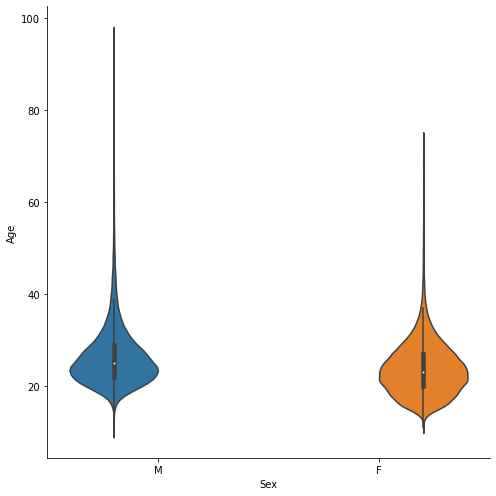

In [206]:
sns.catplot(data=data, x='Sex', y='Age', kind='violin', hue='Sex', height=7, aspect=1)

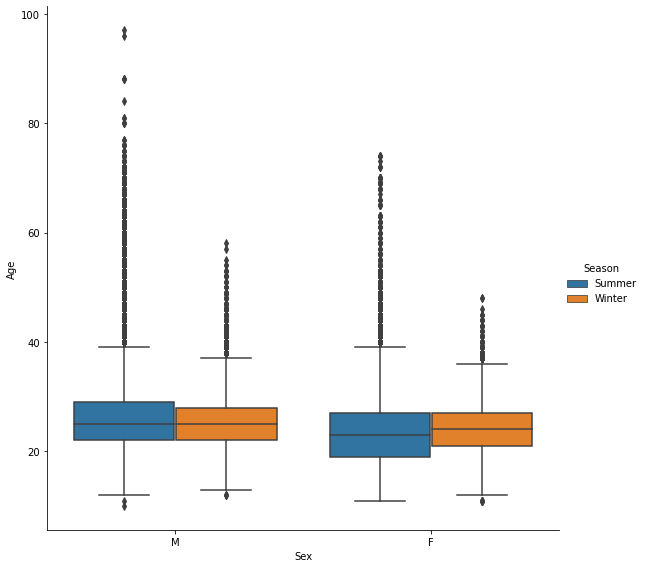

In [211]:
sns.catplot(data=data, x='Sex', y='Age', kind='box', hue='Season', height=8)